In [1]:
import os
import numpy as np
import seaborn as sb
sb.set()
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import os
if os.environ.get("AITUEDATA"):
    print('set')
    data_directory = os.environ['AITUEDATA']
else:
    print('not set')
    #Eusebio
    data_directory = "C:/Users/joaquin/Desktop/mem_aitue/Datos/"
    #Mini-Eusebio
#     data_directory = "C:/Users/jquin/Desktop/Memoria de Titulo/Aitue/Datos/"
    #PC-Mem
#     data_directory = "C:/Users/Joaquin/Desktop/mem_aitue/Datos/"

not set


In [3]:
personas = pd.read_csv(data_directory+'personas.csv')
personas = personas.drop(personas.columns[0], axis=1)
personas = personas.drop(['rut'], axis=1)
personas = pd.get_dummies(personas)
personas.head()

,mean_cot_bod,mean_cot_depto,mean_cot_esta,mean_cot_estu,negocio,nro_cot_bod,nro_cot_depto,nro_cot_esta,nro_cot_estu,nro_proyectos,...,loc_comuna_San Pedro de la Paz,loc_comuna_Talcahuano,loc_provincia_Arica,loc_provincia_Concepcion,loc_provincia_Isla de Pascua,loc_provincia_Otro,loc_provincia_Santiago,loc_region_Bio-Bio,loc_region_Metropolitana,loc_region_Otro
0,0.0,1.0,0.0,0.0,False,0,1,0,0,1,...,0,0,0,1,0,0,0,1,0,0
1,0.0,1.0,0.0,0.0,False,0,1,0,0,1,...,0,0,0,1,0,0,0,1,0,0
2,0.0,1.0,0.0,0.0,False,0,1,0,0,1,...,0,0,0,1,0,0,0,1,0,0
3,0.5,1.0,0.5,0.0,False,1,2,1,0,2,...,0,0,0,1,0,0,0,1,0,0
4,1.0,1.0,1.0,1.0,False,2,2,2,2,1,...,0,0,0,1,0,0,0,1,0,0


In [4]:
personas.columns

Index(['mean_cot_bod', 'mean_cot_depto', 'mean_cot_esta', 'mean_cot_estu',
       'negocio', 'nro_cot_bod', 'nro_cot_depto', 'nro_cot_esta',
       'nro_cot_estu', 'nro_proyectos', 'loc_comuna_Antofagasta',
       'loc_comuna_Chiguayante', 'loc_comuna_Concepción', 'loc_comuna_Coronel',
       'loc_comuna_Hualpén', 'loc_comuna_Isla de Pascua', 'loc_comuna_Lampa',
       'loc_comuna_Los Ángeles', 'loc_comuna_Otro', 'loc_comuna_Penco',
       'loc_comuna_Pirque', 'loc_comuna_San Pedro de la Paz',
       'loc_comuna_Talcahuano', 'loc_provincia_Arica',
       'loc_provincia_Concepcion', 'loc_provincia_Isla de Pascua',
       'loc_provincia_Otro', 'loc_provincia_Santiago', 'loc_region_Bio-Bio',
       'loc_region_Metropolitana', 'loc_region_Otro'],
      dtype='object')

In [5]:
# num_list = ['mean_cot_bod', 'mean_cot_depto', 'mean_cot_esta', 'mean_cot_estu',
#        'nro_cot_bod', 'nro_cot_depto', 'nro_cot_esta',
#        'nro_cot_estu', 'nro_proyectos', 'loc_comuna_Antofagasta',
#        'loc_comuna_Chiguayante', 'loc_comuna_Concepción', 'loc_comuna_Coronel',
#        'loc_comuna_Hualpén', 'loc_comuna_Isla de Pascua', 'loc_comuna_Lampa',
#        'loc_comuna_Los Ángeles', 'loc_comuna_Otro', 'loc_comuna_Penco',
#        'loc_comuna_Pirque', 'loc_comuna_San Pedro de la Paz',
#        'loc_comuna_Talcahuano', 'loc_provincia_Arica',
#        'loc_provincia_Concepcion', 'loc_provincia_Isla de Pascua',
#        'loc_provincia_Otro', 'loc_provincia_Santiago', 'loc_region_Bio-Bio',
#        'loc_region_Metropolitana', 'loc_region_Otro']

In [6]:
# personas = personas[num_list]

# Clustering

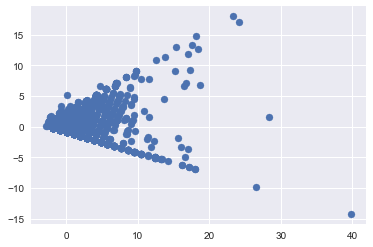

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca.fit(personas)
transformed = pca.transform(personas)

# xs = pca.fit_transform(personas)[:, 0]
# ys = pca.fit_transform(personas)[:, 1]

xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs,ys)
plt.show()

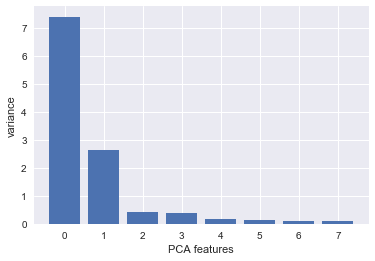

In [27]:
#check variance
pca = PCA(n_components = 8)
pca.fit(personas)

features = range(pca.n_components_)

plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.ylabel('variance')
plt.xlabel('PCA features')
plt.show()


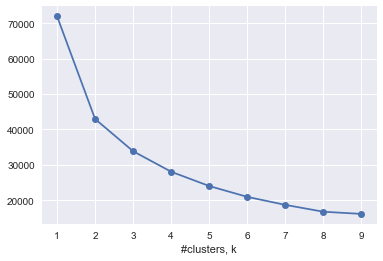

In [26]:
ks = range(1,10)
inertias = []
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(personas)
    inertias.append(model.inertia_)
    
plt.plot(ks,inertias, '-o')
plt.xlabel('#clusters, k')
plt.xticks(ks)
plt.show()

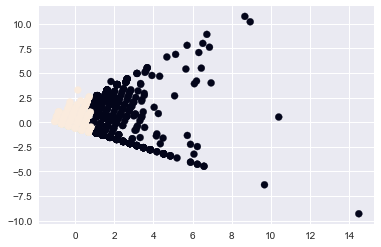

In [28]:
#Clustering
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2, max_iter=300, random_state=None)
clusters = km.fit_predict(personas)

# Principal Component Analysis
pca = PCA(n_components=2, whiten=True)
pca.fit(personas)

xs = pca.fit_transform(personas)[:, 0]
ys = pca.fit_transform(personas)[:, 1]

plt.scatter(xs ,ys, c=clusters)
plt.show()


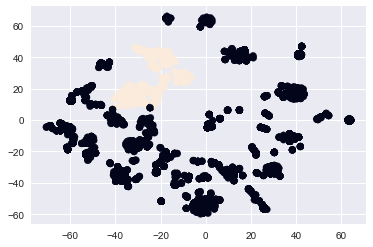

In [29]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2, max_iter=300, random_state=None)
personas['cluster'] = km.fit_predict(personas)

from sklearn.manifold import TSNE

model = TSNE(learning_rate = 100)
transformed = model.fit_transform(personas)

xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs,ys,c=personas['cluster'])
plt.show()

In [34]:
personas.groupby('cluster')['negocio'].mean()

cluster
0    0.065799
1    0.065920
Name: negocio, dtype: float64

# Supervised Learning: Classification

In [54]:
print(personas.shape)
print(personas[personas.negocio == True].shape)
print(personas[personas.negocio == False].shape)

(6184, 32)
(407, 32)
(5777, 32)


In [49]:
X = personas.drop('negocio',axis=1)
y = personas.negocio

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=42)

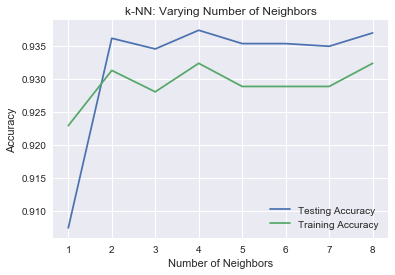

In [51]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


## KNeighors

In [52]:
#KNeighbors

# Import necessary modules
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

# Instantiate a k-NN classifier: knn
knn = KNeighborsClassifier(n_neighbors=4)

# Fit the classifier to the training data
knn.fit(X_train,y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

print(knn.score(X_test, y_test))

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


0.937348423605
[[2318    0]
 [ 155    1]]
             precision    recall  f1-score   support

      False       0.94      1.00      0.97      2318
       True       1.00      0.01      0.01       156

avg / total       0.94      0.94      0.91      2474



## LogisticRegression

In [55]:
#LogisticRegression
# Import necessary modules
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}


# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(X,y)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-05,   8.48343e-05,   7.19686e-04,   6.10540e-03,
         5.17947e-02,   4.39397e-01,   3.72759e+00,   3.16228e+01,
         2.68270e+02,   2.27585e+03,   1.93070e+04,   1.63789e+05,
         1.38950e+06,   1.17877e+07,   1.00000e+08]), 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [56]:
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))
print(logreg_cv.score(X_test,y_test))

Tuned Logistic Regression Parameters: {'C': 1.0000000000000001e-05, 'penalty': 'l1'}
Best score is 0.9341849935316947
0.936944219887


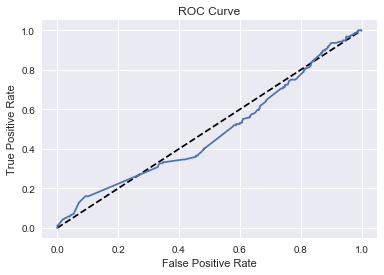

In [44]:
# Import necessary modules
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg_cv.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, treshold = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [58]:
from sklearn.metrics import roc_auc_score

y_pred_prob = logreg_cv.predict_proba(X_test)[:,1]

roc_auc_score(y_test,y_pred_prob)

0.5

## DecisionTree

In [48]:
#Tree

# Import necessary modules
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X,y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))
print(tree_cv.score(X_test,y_test))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 2, 'min_samples_leaf': 3}
Best score is 0.9346701164294955
0.937752627324
